In [1]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('./agaricus-lepiota.data')

df = df.drop(['veil-type', ], axis=1)

# First we must convert the data into ordinal data
label_encoder = LabelEncoder()

df.astype('category')
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

X, y = df.drop(['edibility'], axis=1), df['edibility']

print(X.shape)

skb = SelectKBest(chi2, k=3)
skb.fit(X, y)
X_new = skb.transform(X)

print(X_new.shape)

# Fetch the selected feature indices and print the corresponding feature names
np.array(df.columns)[skb.get_support(indices=True)]

(8124, 21)
(8124, 3)


array(['gill-spacing', 'gill-size', 'ring-number'], dtype=object)

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing

# normalize data
# df = df.drop(['edibility'], axis=1)
data_scaled = pd.DataFrame(preprocessing.scale(df),columns = df.columns) 

# PCA
pca = PCA(n_components=3)
x = pca.fit_transform(data_scaled)

# Dump components relations with features:
result = pd.DataFrame(pca.components_,columns=data_scaled.columns)
print(result)

   edibility  cap-shape  cap-surface  cap-color  bruises?      odor  \
0   0.317823   0.015845     0.103590  -0.150339 -0.326911  0.186437   
1   0.309371   0.052701    -0.060973   0.179786 -0.228288 -0.329548   
2  -0.126494   0.007591    -0.187888   0.217590 -0.202120 -0.067395   

   gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0         0.064336     -0.012396   0.369333   -0.380193  ...   
1        -0.001273     -0.139123  -0.125929   -0.083499  ...   
2         0.158516      0.520236  -0.107956   -0.016734  ...   

   stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  \
0                 -0.145859                 -0.162185                0.061804   
1                 -0.308030                 -0.278258               -0.364847   
2                 -0.269025                 -0.252501                0.180510   

   stalk-color-below-ring  veil-color  ring-number  ring-type  \
0                0.057679    0.061741    -0.015226  -0.402314   
1  

[[-0.32135683 -0.69308374 -0.23564005]
 [-2.47689445 -0.08211911  0.8039332 ]
 [-2.17986107 -0.77088914  0.61767342]
 ...
 [-1.89100823  0.15091838 -1.59728146]
 [ 3.72914266 -1.12077619 -0.71967012]
 [-1.94092825 -0.39731907 -1.73017267]]


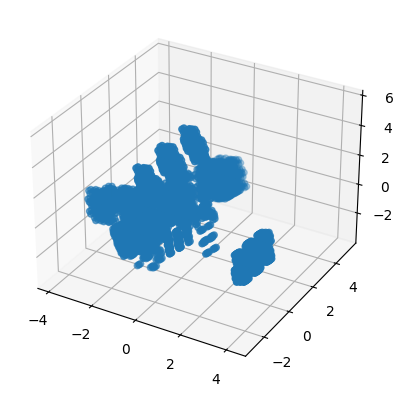

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
print(x)
ax.scatter(x[:, 0], x[:, 1], x[:, 2])

In [4]:
print(result.abs().sum(axis=0).sort_values())
print()

cap-shape                   0.076137
habitat                     0.164858
veil-color                  0.221401
gill-attachment             0.224125
ring-number                 0.292959
cap-surface                 0.352450
stalk-shape                 0.465698
gill-color                  0.480425
cap-color                   0.547715
odor                        0.583380
stalk-color-below-ring      0.593044
stalk-root                  0.593851
population                  0.595379
gill-size                   0.603217
stalk-color-above-ring      0.607161
ring-type                   0.650295
gill-spacing                0.671755
stalk-surface-below-ring    0.692943
spore-print-color           0.708692
stalk-surface-above-ring    0.722914
edibility                   0.753687
bruises?                    0.757319
dtype: float64

